# MICA Inference Demo (Review Notebook)

This notebook demonstrates **MICA** inference on a single image, including:
- Model initialization logs
- Image visualization
- MICA **Scoring** results (5-level distribution + mean score)
- MICA **Description** results

> Note: Paths and checkpoints are intentionally exposed here for reviewer-side reproducibility. Adjust as needed.


In [1]:
# Cell 1 — Load MICA and print logs (paths are stored in cfg.py)

import os
from pathlib import Path

# MICA dependencies (your project)
from mica_api_v3 import load_mica
from models import MICAScoring

# Config file (keep cfg.py local if you do not want to disclose paths)
import cfg

# (Optional) make logs more readable
os.environ.setdefault('TOKENIZERS_PARALLELISM', 'false')

def _mask_path(p: str) -> str:
    """Mask a local path to avoid disclosure in printed logs."""
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"  # keep only filename/dir name
    except Exception:
        return "<LOCAL_PATH>"

# ====== Read paths from cfg.py ======
scoring_ckpt_path = cfg.SCORING_CKPT_PATH
description_model_path = cfg.DESCRIPTION_MODEL_PATH

print("[Init] scoring_ckpt_path:", _mask_path(scoring_ckpt_path))
print("[Init] description_model_path:", _mask_path(description_model_path))
print("[Init] Exists? scoring_ckpt:", Path(scoring_ckpt_path).exists() if scoring_ckpt_path else False)
print("[Init] Exists? description_model_path:", Path(description_model_path).exists() if description_model_path else False)

mica = load_mica(
    scoring_model_ctor=lambda: MICAScoring(),
    scoring_ckpt_path=scoring_ckpt_path,
    description_model_path=description_model_path,
    enable_timing=getattr(cfg, 'ENABLE_TIMING', True),
)

print("[Init] MICA loaded.")


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


[Init] scoring_ckpt_path: <LOCAL_PATH>/mica_scoring_release.pth
[Init] description_model_path: <LOCAL_PATH>/weights
[Init] Exists? scoring_ckpt: True
[Init] Exists? description_model_path: True


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[Init] MICA loaded.


[Input] img_path: <LOCAL_PATH>/2304.jpg


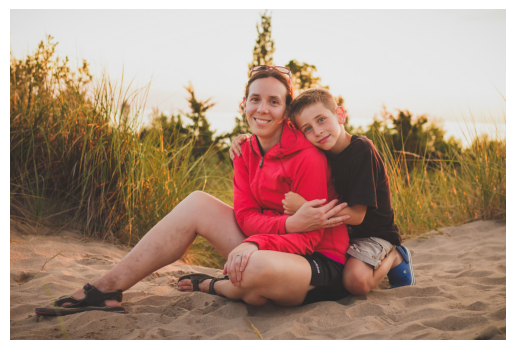

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.012939453125, 0.140625, 0.474609375, 0.33984375, 0.032470703125]
Composition Score: 3.23974609375

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image features a central composition where two individuals are positioned in such a way that they draw immediate attention. Second, their placement creates an engaging focal point for viewers' eyes to follow, as they occupy the middle ground of the frame. Third, this arrangement allows for a balanced visual experience without overwhelming any particular element within the scene.



In [3]:
# Cell 2 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img1_path = cfg.IMG1_PATH
print("[Input] img_path:", _mask_path(img1_path))
# assert img1_path and Path(img1_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img1_path}"

# Display image under this cell
img = Image.open(img1_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img1_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img1_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/8881.jpg


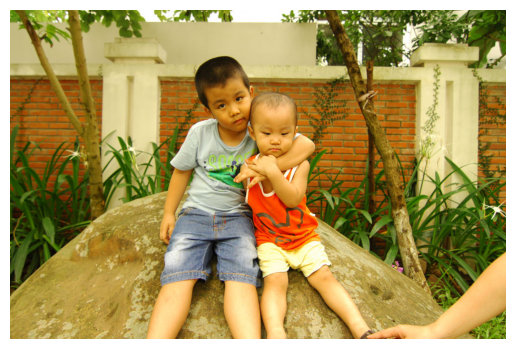

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.00860595703125, 0.44921875, 0.5234375, 0.0172119140625, 0.00106048583984375]
Composition Score: 2.5515060424804688

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image features a central focus on two children sitting closely together on a rock. Second, this arrangement creates an intimate and engaging scene that draws attention to their interaction. Third, despite being centered, there is no clear leading line or distinct shape that guides the viewer's eye through the composition; instead, it feels more like a snapshot capturing a candid moment between friends. The background elements such as trees and brick walls provide context but do not contribute significantly to the overall visual flow due to their static nature. Lastly, while the subjects are positioned centrally, their proximity to each other suggests a sense of closeness which might otherwise enhance the composition if more dynamic positioning were considered.



In [4]:
# Cell 3 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG2_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/8913.jpg


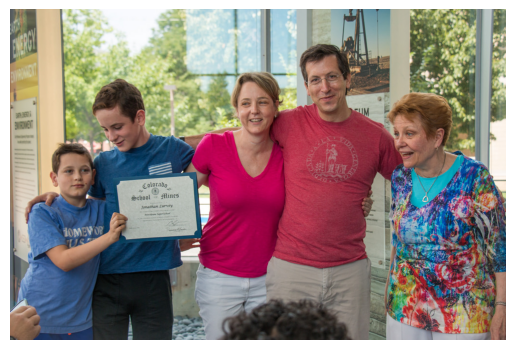

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.00677490234375, 0.6328125, 0.35546875, 0.004364013671875, 0.000255584716796875]
Composition Score: 2.3575401306152344

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image appears to be taken in a casual setting with multiple individuals gathered closely together. Second, there is an apparent lack of clear focal points or leading lines that guide the viewer's eye through the composition; instead, it seems more like a snapshot of a moment rather than a carefully composed photograph. Third, while some elements like the group and their interaction are present, they do not form a cohesive visual narrative due to their placement and arrangement within the frame. The overall impression given by this composition level suggests that it may not have been designed with aesthetic principles in mind, resulting in a less engaging viewing experience compared to compositions where elements are thoughtfully arranged to create balance, contrast, or harmony.



In [5]:
# Cell 4 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG3_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/3261.jpg


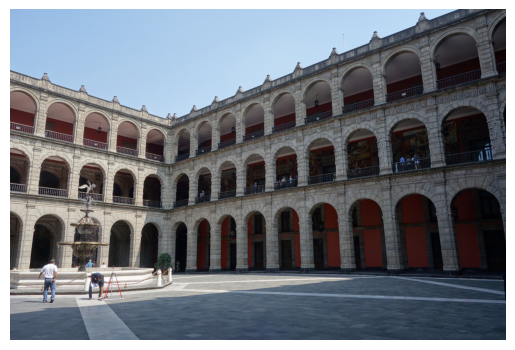

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.0014495849609375, 0.1435546875, 0.73828125, 0.115234375, 0.00156402587890625]
Composition Score: 2.9721603393554688

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image presents a balanced and symmetrical composition. The architectural elements are arranged in such a way that they create visual harmony without overwhelming any particular area of the frame.

Second, there is an effective use of leading lines created by the arches and columns which guide the viewer's eye through the scene from one side to another. This creates depth and perspective within the space.

Third, the spatial relationships between different parts of the structure contribute to a sense of orderliness. The repetition of repeating architectural features adds texture and interest while maintaining coherence throughout the image.

Overall, these compositional choices result in a pleasing and well-structured photograph that effectively conveys its subject matter in a visually appealing manner.



In [6]:
# Cell 5 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG4_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/4032.jpg


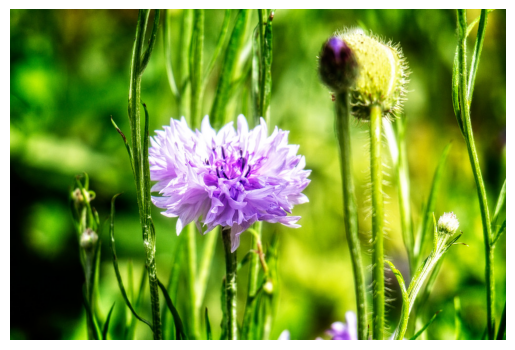

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.01458740234375, 0.11962890625, 0.400390625, 0.412109375, 0.052734375]
Composition Score: 3.36712646484375

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image presents a balanced composition with elements distributed evenly across the frame. Second, there is an emphasis on natural beauty and simplicity in its arrangement of flowers and foliage. Third, the use of depth is achieved through overlapping plants that create layers within the scene, adding dimensionality without overwhelming the visual field.



In [7]:
# Cell 6 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG5_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/3936.jpg


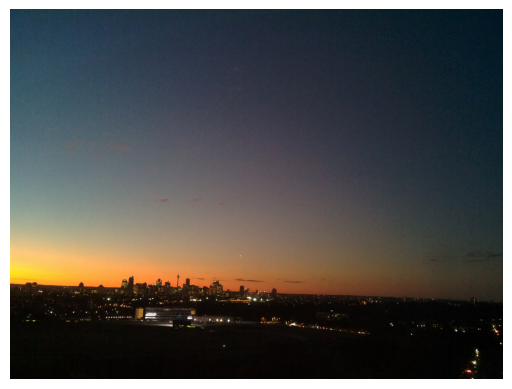

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.01019287109375, 0.1630859375, 0.546875, 0.26171875, 0.017822265625]
Composition Score: 3.11297607421875

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image presents a horizontal composition that captures an expansive view of a city skyline at dusk. Second, this arrangement emphasizes the vastness and scale of the urban landscape against the backdrop of a gradient sky transitioning from deep blue to warm orange hues near the horizon. Third, the horizon line is clearly defined, dividing the sky from the land below into distinct layers, which adds depth to the visual experience. Fourth, the lighting conditions create subtle shadows and highlights across the scene, contributing to a sense of dimensionality and spatial separation within the frame. Fifth, the overall balance between light and dark areas ensures that no single element dominates the composition, allowing for an equal distribution of visual weight throughout the image. This careful orchestration results in a visually pleasing and well-structured photograph where each element complements the others harmoniously.



In [8]:
# Cell 7 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG6_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/4338.jpg


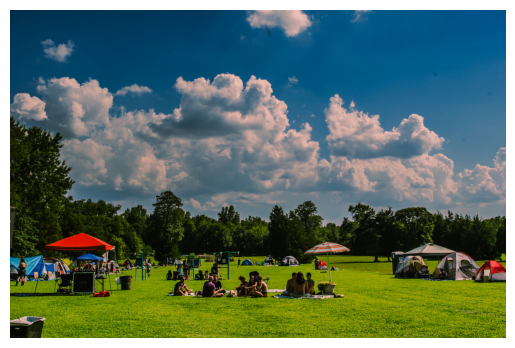

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.003814697265625, 0.0693359375, 0.39453125, 0.50390625, 0.029296875]
Composition Score: 3.488189697265625

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image presents a broad and expansive view of an outdoor setting. Second, there is a clear sense of depth created by the arrangement of various elements in relation to each other. Third, the horizon line divides the composition into two distinct sections: sky and land, which provides balance to the overall scene.



In [9]:
# Cell 8 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG7_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/5006.jpg


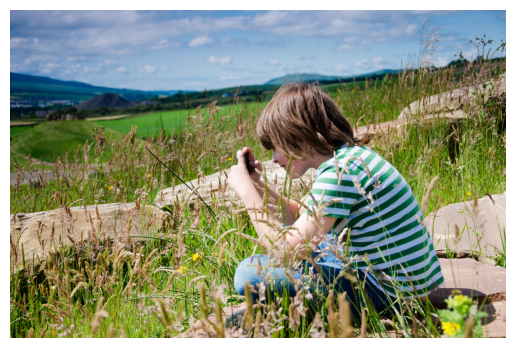

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.0126953125, 0.095703125, 0.330078125, 0.490234375, 0.0703125]
Composition Score: 3.5068359375

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image features a subject positioned centrally within the frame. This central placement draws immediate attention to the individual and creates a balanced composition that is visually stable.

Second, there is an effective use of negative space around the main figure, which helps to isolate the person from any potential distractions in the background. The open sky above provides a sense of openness and space, contributing to the overall harmony of the scene.

Third, the natural elements surrounding the subject—such as grasses and trees—integrate seamlessly into the landscape without overwhelming the primary focus. Their placement complements the central positioning of the person, enhancing the visual flow of the image.

In summary, the arrangement of these compositional elements results in a well-balanced and visually pleasing photograph where the central figure stands out prominently against the backdrop of nature.



In [10]:
# Cell 9 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG8_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/6389.jpg


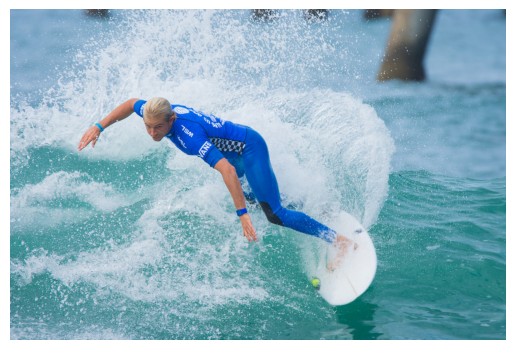

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.001983642578125, 0.029052734375, 0.1650390625, 0.703125, 0.0986328125]
Composition Score: 3.860870361328125

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image is centered around a dynamic action shot of a surfer riding a wave. Second, this central focus creates an engaging visual path that draws attention directly to the subject without any distractions in the background or foreground. Third, the use of leading lines formed by the wave's motion and the surfer’s body directs the viewer’s gaze towards the center where the main event takes place. Fourth, the composition effectively utilizes negative space around the surfer to emphasize their form and movement against the backdrop of the ocean. Fifth, the balance between the subject and the surrounding environment ensures that the primary element (the surfer) remains prominent while still allowing for context within the scene. This careful arrangement results in a well-composed photograph where the viewer’s eye naturally follows the intended focal point throughout the frame.



In [11]:
# Cell 10 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG9_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")


[Input] img_path: <LOCAL_PATH>/7520.jpg


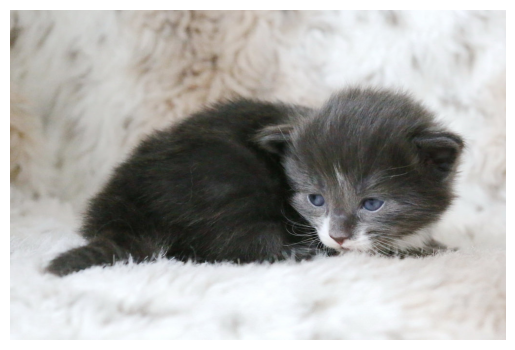

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.



==================== MICA Scoring ====================
Composition Distribution: [0.02001953125, 0.17578125, 0.478515625, 0.291015625, 0.034912109375]
Composition Score: 3.145751953125

================== MICA Description ==================


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Composition comments:
 First, the image features a central subject that is clearly defined and occupies most of the frame. Second, there is an absence of leading lines or complex spatial relationships to guide the viewer's eye through the composition; instead, it presents a straightforward arrangement centered around the kitten. Third, while the simplicity of the subject matter may be effective in conveying focus, the lack of additional elements in the background can make the overall visual experience somewhat flat and unengaging. This results in a composition level that can be considered poor due to its lack of depth and interest beyond the primary subject.



In [12]:
# Cell 11 — Load one image, display it, and run MICA inference (Scoring + Description)

from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

import cfg

def _mask_path(p: str) -> str:
    if not p:
        return "<EMPTY>"
    try:
        return f"<LOCAL_PATH>/{Path(p).name}"
    except Exception:
        return "<LOCAL_PATH>"

img_path = cfg.IMG10_PATH
print("[Input] img_path:", _mask_path(img_path))
# assert img1_path and Path(img_path).exists(), f"Image not found or empty IMG1_PATH in cfg.py: {img_path}"

# Display image under this cell
img = Image.open(img_path).convert("RGB")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

# ---- Scoring ----
print("\n==================== MICA Scoring ====================")
score_res = mica.scoring(img_path)
dist_5 = score_res.dist_5.tolist() if hasattr(score_res, "dist_5") else None
mean_score = float(score_res.mean_score) if hasattr(score_res, "mean_score") else None
t_scoring = getattr(score_res, "time_forward", None)

print("Composition Distribution:", dist_5)
print("Composition Score:", mean_score)
# print("time_forward (s):", t_scoring)

# ---- Description (two-turn) ----
print("\n================== MICA Description ==================")
desc_res = mica.description(image_path=img_path)
resp1 = getattr(desc_res, "response1", None)
resp2 = getattr(desc_res, "response2", None)
t_d1 = getattr(desc_res, "time_forward1", None)
t_d2 = getattr(desc_res, "time_forward2", None)

print("Composition comments:\n", resp1)
# print("\n[Turn-2] Composition principles:\n", resp2)
# print("\ntime_forward1 (s):", t_d1)
# print("time_forward2 (s):", t_d2)
print("======================================================\n")
